In [8]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression:
    def __init__(self, num_samples = 100, sine_scale = 1):
        self.num_samples = num_samples
        self.sine_scale = sine_scale
        self.x = np.linspace(-1, 1, num_samples)
        self.y = np.sin(self.x * self.sine_scale * np.pi)
        
    def plot_graph(self, coefficients, show_scatter=False):
        x_smooth = np.linspace(-1, 1, 1000)        
        y_smooth = np.sin(x_smooth * self.sine_scale * np.pi)
        p = np.poly1d(coefficients[::-1])

        plt.plot(x_smooth, y_smooth)
        if show_scatter:
            plt.scatter(self.x, self.y)
        plt.plot(x_smooth, p(x_smooth), color='red')
        plt.show()

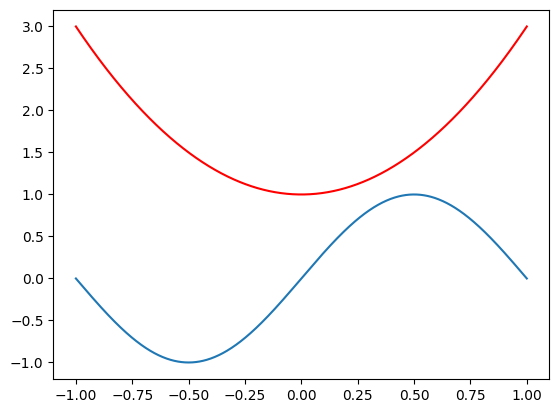

In [9]:
r = PolynomialRegression(sine_scale=1)
r.plot_graph([1, 0, 2])